## Import

In [382]:
from matplotlib import pyplot as plt

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from keras.callbacks import History
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score

import sklearn.metrics as metrics

sns.color_palette("viridis")

import warnings
warnings.filterwarnings('ignore')

In [383]:
data = pd.read_csv("cocacola.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...,...
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900


In [384]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [385]:
data.index = data.pop('Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...
2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6 KB


In [387]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
std,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08


In [388]:
nan_count = data.isnull().sum().sort_values()
print(nan_count)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [389]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

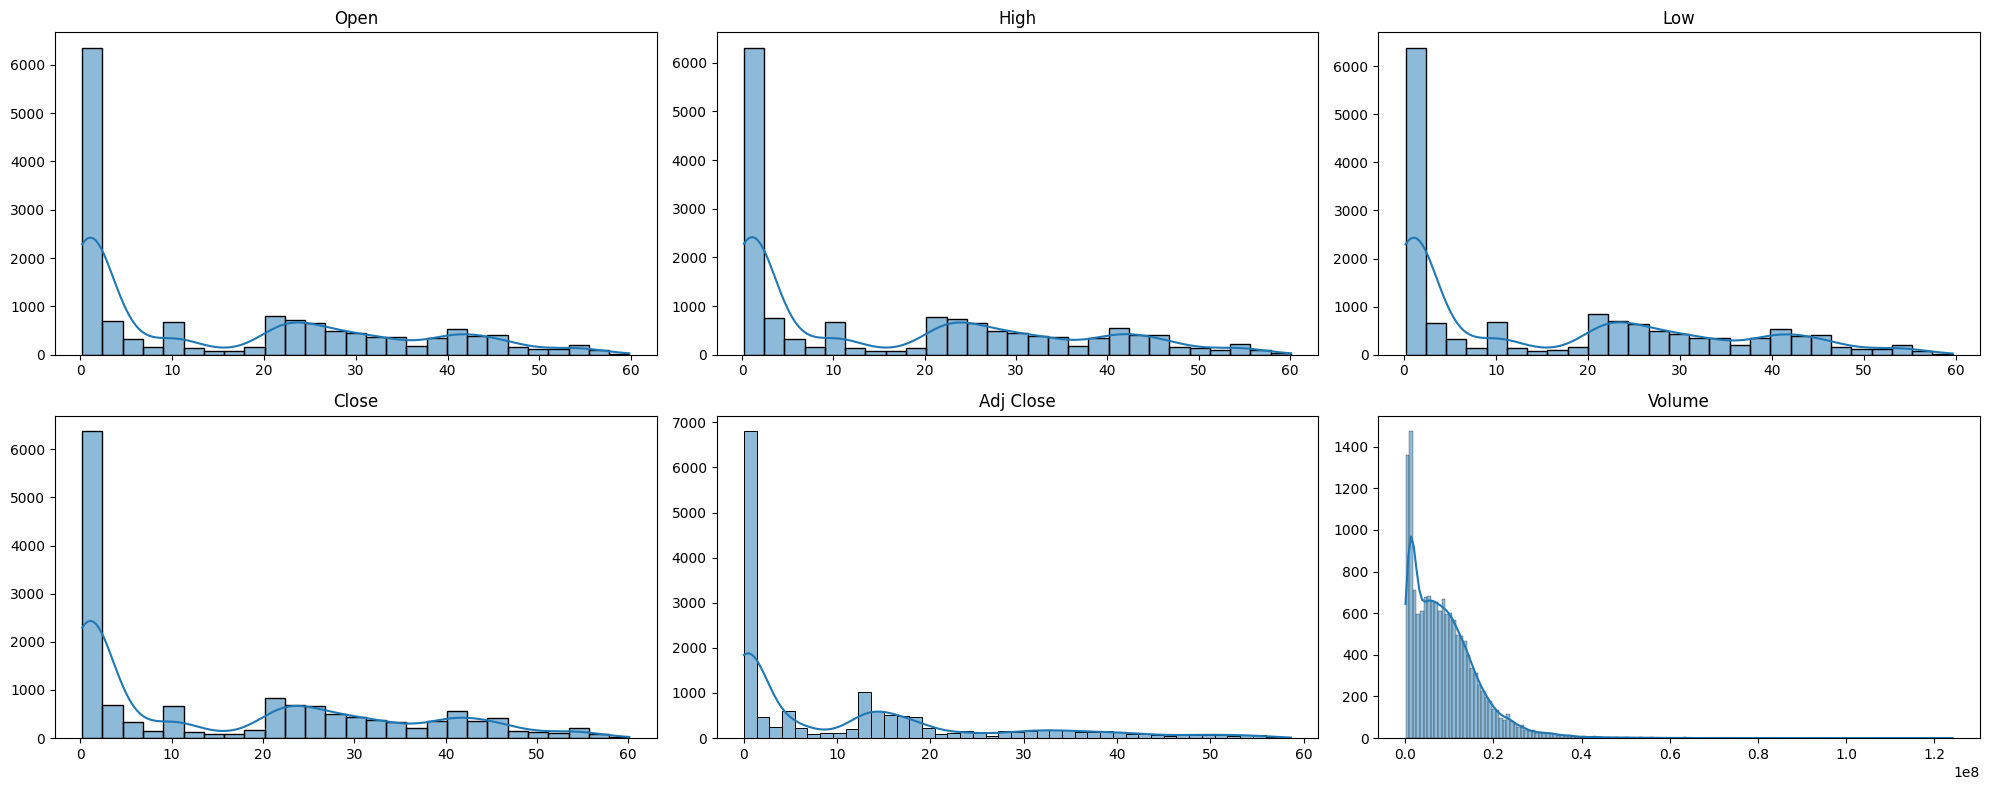

In [390]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

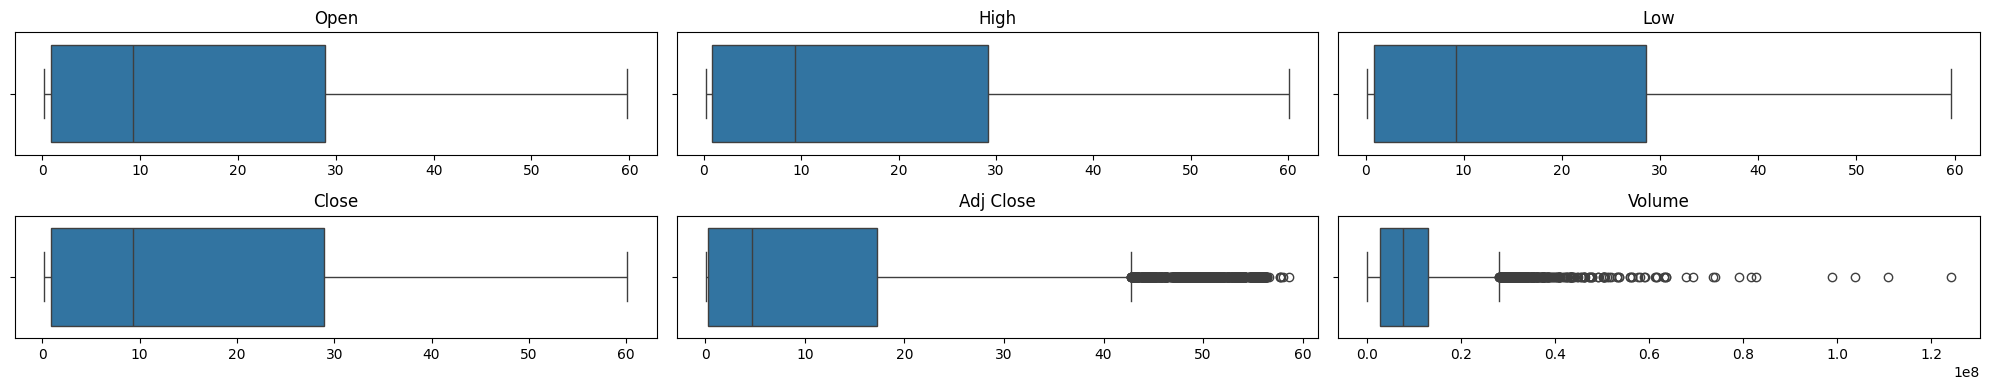

In [391]:
fig, axes = plt.subplots(2, 3, figsize=(20, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.boxplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [392]:
def plot(data, columns, x):
    fig, axes = plt.subplots(3, 2, figsize=(20, 8))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.lineplot(x=x, y=column_name, data=data, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

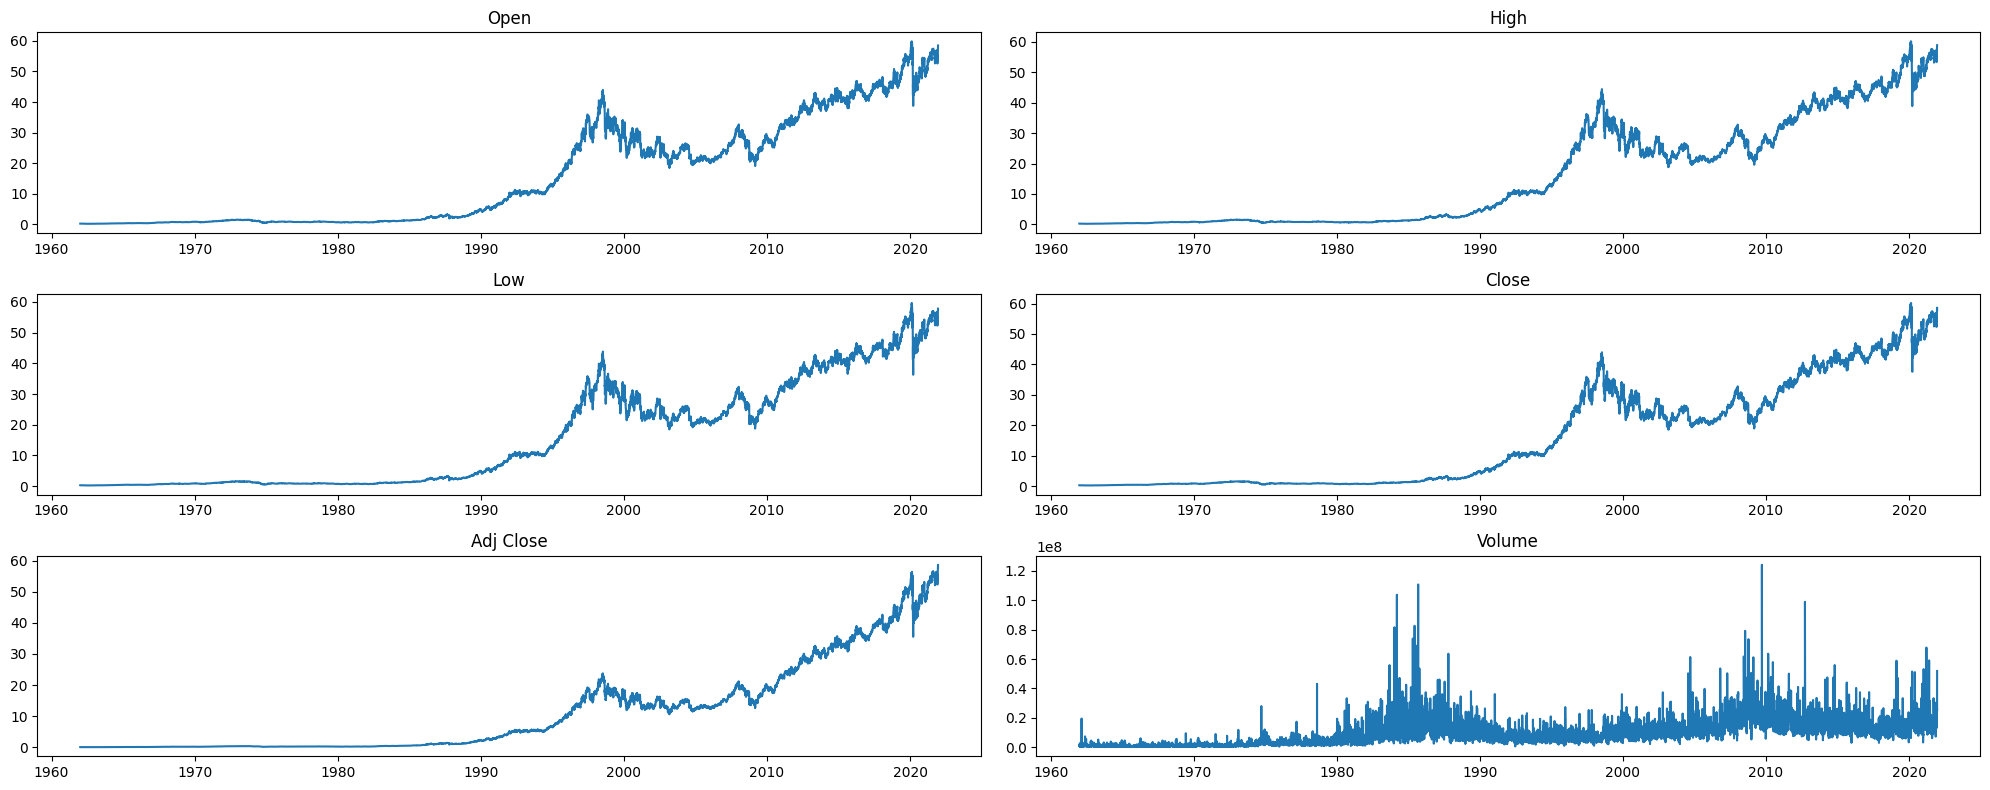

In [393]:
plot(data, columns, 'Date')

In [394]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


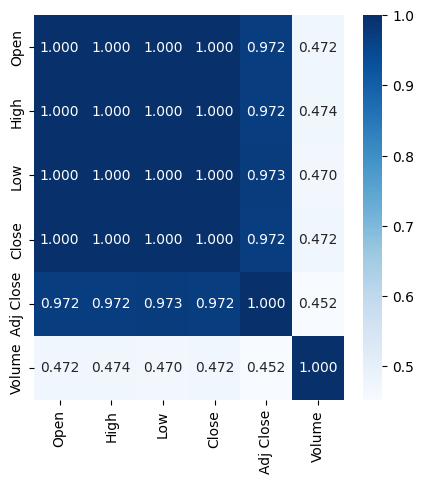

In [395]:
df_corr = data.corr()
plt.figure(figsize = (5,5))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

Podela podataka na train, val i test skup (70%, 20%, 10%).

In [396]:
data = data.drop(columns=['High', 'Low', 'Open', 'Adj Close', 'Volume'])

In [397]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

print("Train size : ", train_df.shape, "\n"
      "Validation size : ", val_df.shape, "\n"
      "Test Size : ", test_df.shape)

train_df

Train size :  (10567, 1) 
Validation size :  (3019, 1) 
Test Size :  (1510, 1)


,Close
Date,
1962-01-02,0.263021
1962-01-03,0.257161
1962-01-04,0.259115
1962-01-05,0.253255
1962-01-08,0.250651
...,...
2003-12-16,25.340000
2003-12-17,25.084999
2003-12-18,24.969999


In [398]:
train_df.columns

Index(['Close'], dtype='object')

Normalizacija podataka

In [399]:
scaler = MinMaxScaler()

col = ['Close']

train_df[col] = scaler.fit_transform(train_df[col])
val_df[col] = scaler.transform(val_df[col])
test_df[col] = scaler.transform(test_df[col])


In [400]:
target = ['Close']

def split_into_windows(data, window_size, step_size):
    X, Y = [], []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data.iloc[i:i+window_size])
        Y.append(data.iloc[i+window_size][target])
    return np.array(X), np.array(Y)

In [401]:
X_train, Y_train = split_into_windows(train_df.astype(np.float32), 10, 1)
X_val, Y_val = split_into_windows(val_df.astype(np.float32), 10, 1)
X_test, Y_test = split_into_windows(test_df.astype(np.float32), 10, 1)

In [402]:
print("Train size : ", X_train.shape, Y_train.shape,"\n",
      "Val size : ", X_val.shape, Y_val.shape,"\n",
      "Test Size : ", X_test.shape, Y_train.shape)

Train size :  (10557, 10, 1) (10557, 1) 
 Val size :  (3009, 10, 1) (3009, 1) 
 Test Size :  (1500, 10, 1) (10557, 1)


pomocne funkcije

In [403]:
results = pd.DataFrame(columns=['Model', 'mean abs', 'R2', 'mean sqrd'])


In [404]:

def print_result(model, model_name, X_test, y_test, end=-1):

    y_pred = model.predict(X_test)

    mean_abs = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mean_sqrd = metrics.mean_squared_error(y_test, y_pred)

    results.loc[len(results)] = [model_name, mean_abs, r2, mean_sqrd]

    # fig, axs = plt.subplots(4, 2, figsize=(12, 12)) 

    # for k in range(0,8):
    #     i = k // 2 
    #     j = k % 2   
        
    #     axs[i, j].plot(y_test[:, k], label='True')   
    #     axs[i, j].plot(y_pred[:, k], label='Predicted') 
    #     axs[i, j].set_xlabel(data.columns[k])  
    #     axs[i, j].legend()

    plt.plot(y_test, label='True')   
    plt.plot(y_pred, label='Predicted') 
    plt.tight_layout()  
    plt.show()


    display(results)



In [405]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)


Modeli


In [406]:
history = History()
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's Training & Validation loss across epochs")
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# SimpleRNN

### Adam

#### simple RNN

In [407]:

model_srnn = Sequential()
model_srnn.add(SimpleRNN(units = 20, activation = "relu", return_sequences = False, input_shape = (X_train.shape[1],1)))
model_srnn.add(Dense(20, activation='relu'))
model_srnn.add(Dense(units = 1))
model_srnn.compile(optimizer=Adam(learning_rate=0.001), loss = "mean_squared_error")
history = model_srnn.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs = 50, batch_size = 32, callbacks=[ history, early_stopping] )


Epoch 1/50
 20/330 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1407  

330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0411 - val_loss: 7.8407e-05
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2997e-05 - val_loss: 7.8071e-05
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4883e-05 - val_loss: 9.1350e-05
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1805e-05 - val_loss: 8.7489e-05
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9324e-05 - val_loss: 6.6673e-05
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8778e-05 - val_loss: 7.0926e-05
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4887e-05 - val_loss: 7.1957e-05
Epoch 8/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4447e-05 - val_loss: 6.3326e-05
Epoch 9/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7572e-05 - val_loss: 1.2148e-04
Epoch 10/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8153e-05 - val_loss: 1.0807e-04
Epoch 11/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6929e-05 - 

In [408]:
model_srnn.evaluate(X_test,Y_test)
model_srnn.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011    


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_39 (SimpleRNN)       │ (None, 20)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,645 (10.34 KB)

 Trainable params: 881 (3.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,764 (6.89 KB)

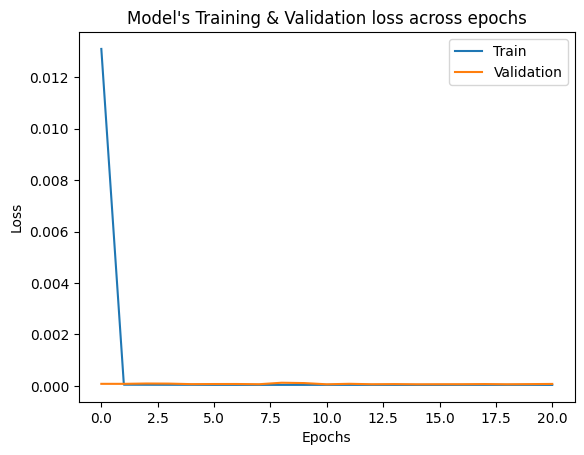

31/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


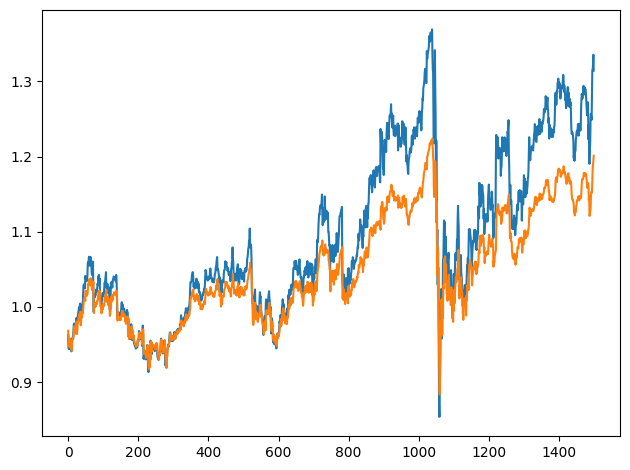

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237


In [409]:

plotloss(history)
print_result(model_srnn, 'SimpleRNN 20 units, Adam', X_test, Y_test, 200)


#### 50 units and early stopping

In [410]:
model = Sequential()
# adding RNN layers and dropout regularization 
model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))
# adding the output layer
model.add(Dense(units = len(target), activation='sigmoid')) 
# compiling RNN
model.compile(optimizer = Adam(learning_rate=0.001), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, 
                    validation_data=(X_val, Y_val), 
                    epochs = 50, batch_size = 32,
                    callbacks=[ history, early_stopping]
                    )

Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0182 - mean_absolute_error: 0.0668 - root_mean_squared_error: 0.1169 - val_loss: 0.0087 - val_mean_absolute_error: 0.0858 - val_root_mean_squared_error: 0.0926
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.4979e-04 - mean_absolute_error: 0.0093 - root_mean_squared_error: 0.0187 - val_loss: 0.0068 - val_mean_absolute_error: 0.0732 - val_root_mean_squared_error: 0.0816
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.0985e-04 - mean_absolute_error: 0.0086 - root_mean_squared_error: 0.0176 - val_loss: 0.0047 - val_mean_absolute_error: 0.0617 - val_root_mean_squared_error: 0.0678
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.3697e-04 - mean_absolute_error: 0.0074 - root_mean_squared_error: 0.0154 - val_loss: 0.0078 - val_mean_absolute_error: 0.0829 - val_root_mean_squared_error: 0.0878
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.3806e-04 - mean_absolute_error: 0.0075 - root_me

In [411]:
model.evaluate(X_test,Y_test)
model.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.1983 - root_mean_squared_error: 0.2038


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_40 (SimpleRNN)       │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_41 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_42 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_43 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,405 (208.62 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,604 (139.08 KB)

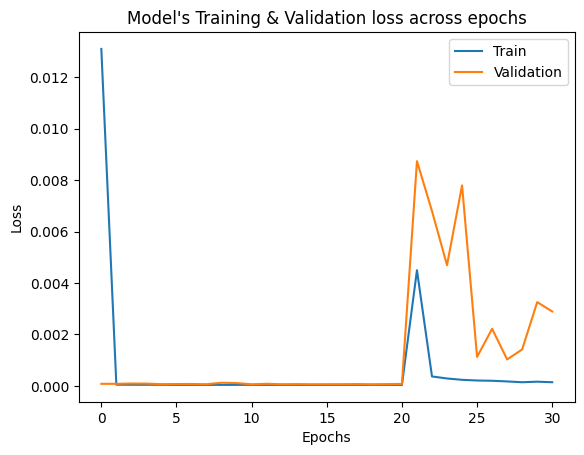

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


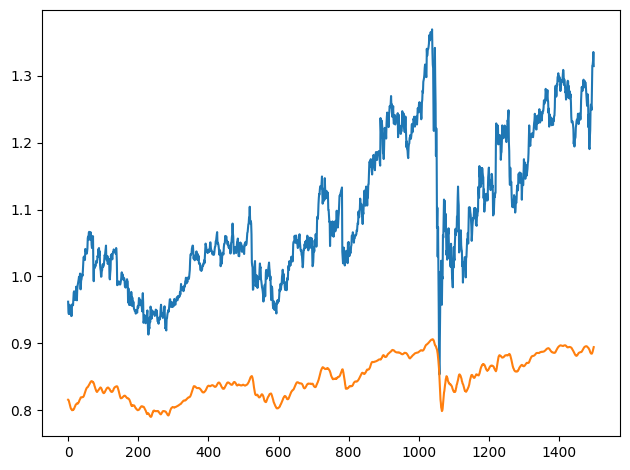

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895


In [412]:

plotloss(history)
print_result(model, 'SimpleRNN 4 units 50, Dropout, Adam 0.001', X_test, Y_test, 200)

### SGD

In [413]:

model = Sequential()
# adding RNN layers and dropout regularization 
model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))
# adding the output layer
model.add(Dense(units = len(target), activation='sigmoid')) 
# compiling RNN
model.compile(optimizer = SGD(learning_rate=0.001,decay=1e-6,  momentum=0.9, nesterov=True), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, 
                    validation_data=(X_val, Y_val), 
                    epochs = 11, batch_size = 32,
                    callbacks=[ history, early_stopping]
                    )


Epoch 1/11


330/330 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0487 - mean_absolute_error: 0.1812 - root_mean_squared_error: 0.2119 - val_loss: 0.0057 - val_mean_absolute_error: 0.0634 - val_root_mean_squared_error: 0.0742
Epoch 2/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0527 - root_mean_squared_error: 0.0589 - val_loss: 0.0064 - val_mean_absolute_error: 0.0691 - val_root_mean_squared_error: 0.0788
Epoch 3/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0449 - root_mean_squared_error: 0.0516 - val_loss: 0.0070 - val_mean_absolute_error: 0.0684 - val_root_mean_squared_error: 0.0825
Epoch 4/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0399 - root_mean_squared_error: 0.0472 - val_loss: 0.0075 - val_mean_absolute_error: 0.0713 - val_root_mean_squared_error: 0.0854
Epoch 5/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0020 - mean_absolute_error: 0.0363 - root_mean_squared_error

In [414]:
model.evaluate(X_test,Y_test)
model.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0455 - mean_absolute_error: 0.2019 - root_mean_squared_error: 0.2101


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_44 (SimpleRNN)       │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_45 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_46 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_47 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

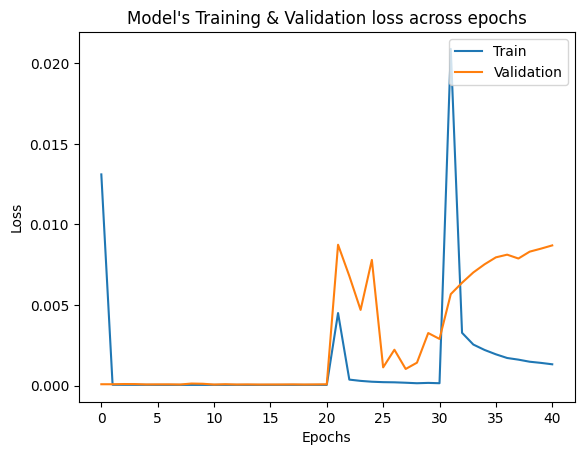

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


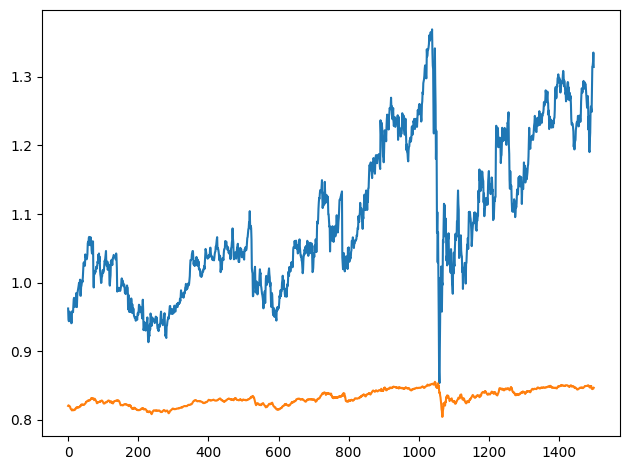

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764


In [415]:
plotloss(history)
print_result(model, 'SimpleRNN 4 units 50, Dropout, SGD 0.001', X_test, Y_test, 200)

# LSTM

### Adam

#### LSTM  64

In [416]:


model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'],
             )

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])



Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0113 - mean_absolute_error: 0.0392 - val_loss: 3.0919e-04 - val_mean_absolute_error: 0.0136
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.6357e-04 - mean_absolute_error: 0.0073 - val_loss: 5.4821e-04 - val_mean_absolute_error: 0.0205
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1460e-04 - mean_absolute_error: 0.0054 - val_loss: 7.2595e-04 - val_mean_absolute_error: 0.0239
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0582e-04 - mean_absolute_error: 0.0056 - val_loss: 1.2476e-04 - val_mean_absolute_error: 0.0082
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.5530e-05 - mean_absolute_error: 0.0052 - val_loss: 8.6352e-04 - val_mean_absolute_error: 0.0272
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.6539e-05 - mean_absolute_error: 0.0054 - val_loss: 1.0175e-04 - val_mean_absolute_error: 0.0073
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.3343e

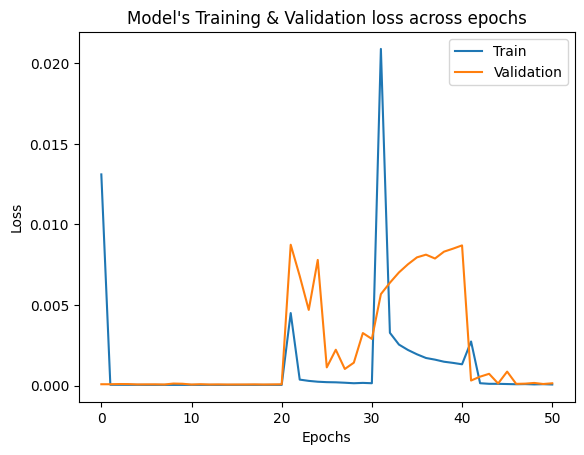

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


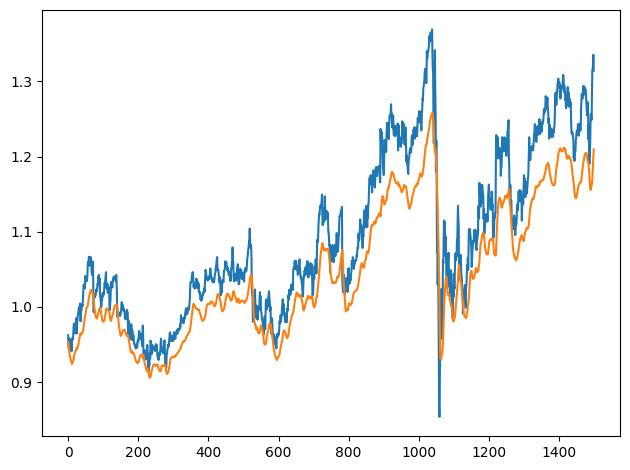

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764
3,"LSTM 64, Dense 2 25,1, Adam 0.001",0.047639,0.749128,0.002934


In [417]:
plotloss(history)

print_result(model, 'LSTM 64, Dense 2 25,1,  Adam 0.001', X_test, Y_test)


#### LSTM 2 layers 50 units

In [418]:
regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(64, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(32, return_sequences = False))
regressorLSTM.add(Dense(25, activation="relu"))
regressorLSTM.add(Dense(len(target),activation="relu"))
regressorLSTM.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
regressorLSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0294 - val_loss: 4.2386e-04 - val_mean_absolute_error: 0.0157
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.7277e-04 - mean_absolute_error: 0.0070 - val_loss: 5.6985e-04 - val_mean_absolute_error: 0.0185
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.5221e-04 - mean_absolute_error: 0.0064 - val_loss: 3.8838e-04 - val_mean_absolute_error: 0.0146
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.8858e-04 - mean_absolute_error: 0.0076 - val_loss: 2.0694e-04 - val_mean_absolute_error: 0.0109
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.5990e-04 - mean_absolute_error: 0.0075 - val_loss: 6.9139e-04 - val_mean_absolute_error: 0.0222
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3765e-04 - mean_absolute_error: 0.0062 - val_loss: 5.9828e-04 - val_mean_absolute_error: 0.0204
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.1643e

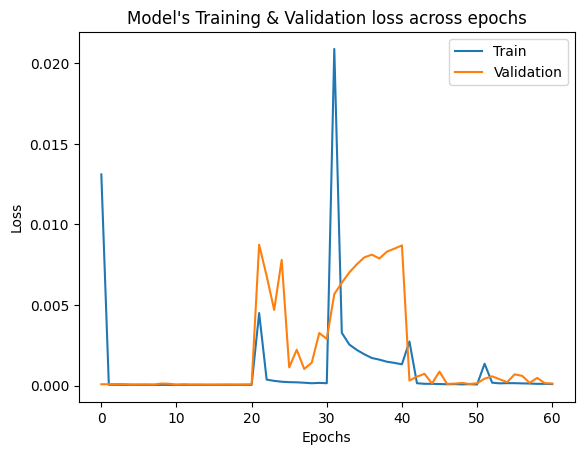

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


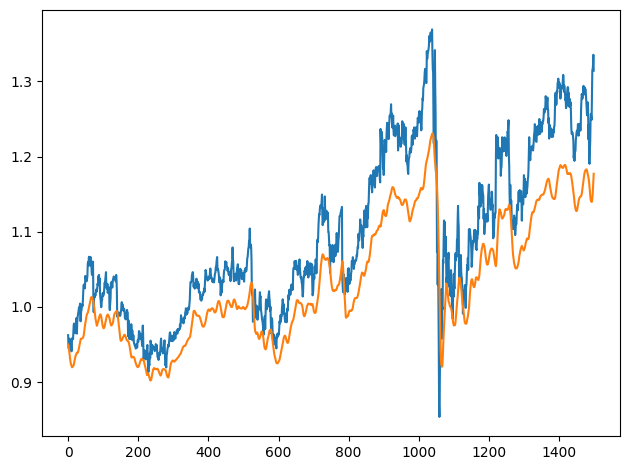

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764
3,"LSTM 64, Dense 2 25,1, Adam 0.001",0.047639,0.749128,0.002934
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.059339,0.613787,0.004517


In [419]:

plotloss(history)
print_result(regressorLSTM, 'LSTM 2 units 50, Dense 2 25,1,  Adam 0.001', X_test, Y_test)


In [420]:

regressorLSTM.summary()
result = regressorLSTM.evaluate(X_test,Y_test)


Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_105 (LSTM)                 │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_106 (LSTM)                 │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,491 (353.48 KB)

 Trainable params: 30,163 (117.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,328 (235.66 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - mean_absolute_error: 0.0443


#### LSTM 32,16

In [421]:

regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(32, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(16, return_sequences = False))

regressorLSTM.add(Dense(len(target),activation="relu"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error"])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])



Epoch 1/200


165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0172 - mean_absolute_error: 0.0651 - val_loss: 5.2576e-04 - val_mean_absolute_error: 0.0167
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4221e-04 - mean_absolute_error: 0.0060 - val_loss: 4.2390e-04 - val_mean_absolute_error: 0.0152
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5992e-04 - mean_absolute_error: 0.0063 - val_loss: 3.3032e-04 - val_mean_absolute_error: 0.0138
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3162e-04 - mean_absolute_error: 0.0057 - val_loss: 3.8213e-04 - val_mean_absolute_error: 0.0144
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3638e-04 - mean_absolute_error: 0.0057 - val_loss: 4.7461e-04 - val_mean_absolute_error: 0.0183
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5425e-04 - mean_absolute_error: 0.0064 - val_loss: 2.9144e-04 - val_mean_absolute_error: 0.0135
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1

In [422]:
result = regressorLSTM.evaluate(X_test,Y_test)
regressorLSTM.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - mean_absolute_error: 0.0575


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_107 (LSTM)                 │ (None, 10, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_108 (LSTM)                 │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,517 (87.96 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,012 (58.64 KB)

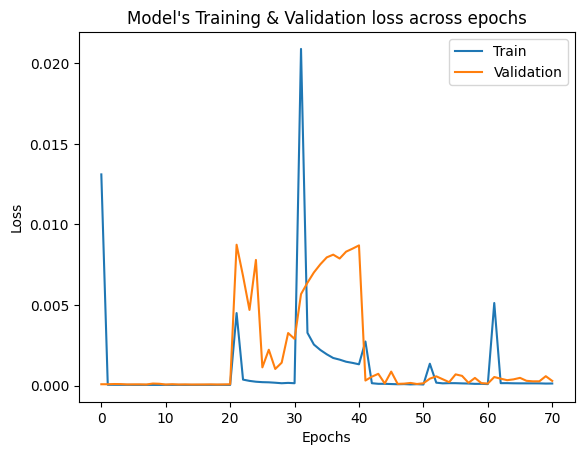

 1/47 ━━━━━━━━━━━━━━━━━━━━ 21s 458ms/step

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


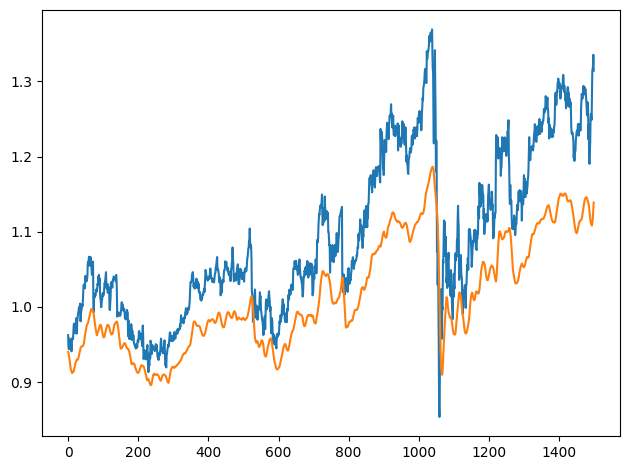

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764
3,"LSTM 64, Dense 2 25,1, Adam 0.001",0.047639,0.749128,0.002934
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.059339,0.613787,0.004517
5,"LSTM 32, 16, Adam 0.001",0.077861,0.349514,0.007609


In [423]:

plotloss(history)
print_result(regressorLSTM, 'LSTM 32, 16,   Adam 0.001', X_test, Y_test)



#### LSTM 4 layers 50 units dropout

In [424]:
regressorLSTM = Sequential()
regressorLSTM.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(units=50,return_sequences=True,activation='tanh'))
regressorLSTM.add(LSTM(units=50,return_sequences=True, activation='tanh'))
regressorLSTM.add(LSTM(units=50,activation='tanh'))
regressorLSTM.add(Dense(units=len(target),activation='relu'))
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])


Epoch 1/200


165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0851 - mean_absolute_error: 0.1644 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0860 - mean_absolute_error: 0.1653 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0858 - mean_absolute_error: 0.1650 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0852 - mean_absolute_error: 0.1637 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0863 - mean_absolute_error: 0.1649 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0832 - mean_absolute_error: 0.1610 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0836 - mean_absolute_error: 0.1614 -

In [425]:
result = regressorLSTM.evaluate(X_test,Y_test)
regressorLSTM.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0614 - mean_absolute_error: 1.0273


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_109 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_110 (LSTM)                 │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_111 (LSTM)                 │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_112 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

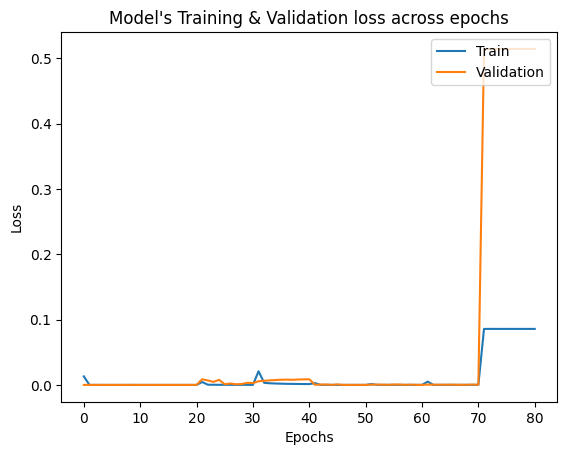

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


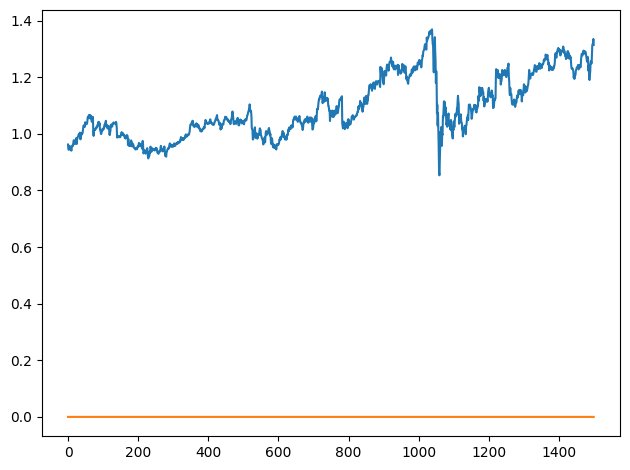

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764
3,"LSTM 64, Dense 2 25,1, Adam 0.001",0.047639,0.749128,0.002934
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.059339,0.613787,0.004517
5,"LSTM 32, 16, Adam 0.001",0.077861,0.349514,0.007609
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249


In [426]:

plotloss(history)
print_result(regressorLSTM, 'LSTM 4 layers 50 units dropout', X_test, Y_test)


# GRU

### Adam

### 4 layers 50 units and dropout

In [427]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=len(target),activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])



Epoch 1/200


165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0143 - mean_absolute_error: 0.0559 - val_loss: 6.2091e-04 - val_mean_absolute_error: 0.0182
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.3896e-04 - mean_absolute_error: 0.0074 - val_loss: 2.7210e-04 - val_mean_absolute_error: 0.0131
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 2.2381e-04 - mean_absolute_error: 0.0074 - val_loss: 2.3641e-04 - val_mean_absolute_error: 0.0119
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.1369e-04 - mean_absolute_error: 0.0081 - val_loss: 2.7648e-04 - val_mean_absolute_error: 0.0124
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.9562e-04 - mean_absolute_error: 0.0075 - val_loss: 3.1288e-04 - val_mean_absolute_error: 0.0143
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.1887e-04 - mean_absolute_error: 0.0078 - val_loss: 3.1744e-04 - val_mean_absolute_error: 0.0134
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - 

In [428]:
regressorGRU.summary()
result = regressorGRU.evaluate(X_test,Y_test)


Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_26 (GRU)                    │ (None, 10, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_27 (GRU)                    │ (None, 10, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_28 (GRU)                    │ (None, 10, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_29 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,705 (631.66 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,804 (421.11 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0583


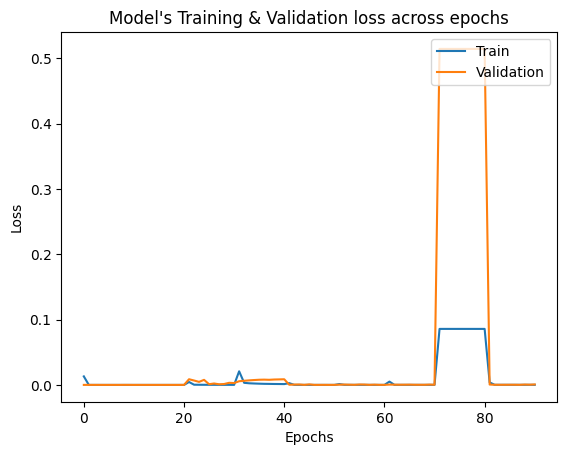

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


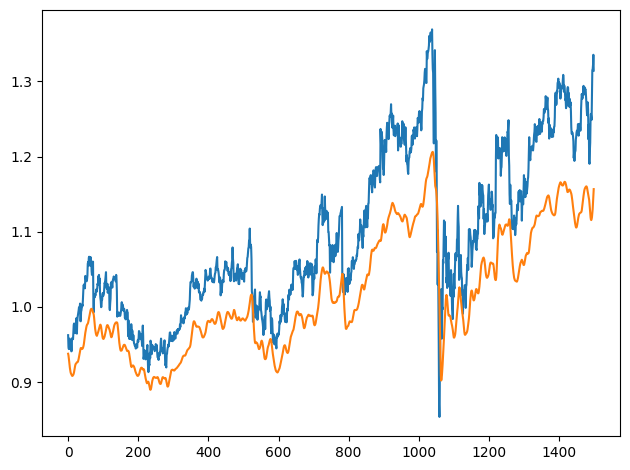

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764
3,"LSTM 64, Dense 2 25,1, Adam 0.001",0.047639,0.749128,0.002934
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.059339,0.613787,0.004517
5,"LSTM 32, 16, Adam 0.001",0.077861,0.349514,0.007609
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"GRU L 4 units 50, Adam 0.001",0.075335,0.414227,0.006852


In [429]:

plotloss(history)

print_result(regressorGRU, 'GRU L 4 units 50, Adam 0.001', X_test, Y_test)


# Result

In [430]:
results

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764
3,"LSTM 64, Dense 2 25,1, Adam 0.001",0.047639,0.749128,0.002934
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.059339,0.613787,0.004517
5,"LSTM 32, 16, Adam 0.001",0.077861,0.349514,0.007609
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"GRU L 4 units 50, Adam 0.001",0.075335,0.414227,0.006852


# drugi nacin

In [431]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [432]:
data

,Close
Date,
1962-01-02,0.263021
1962-01-03,0.257161
1962-01-04,0.259115
1962-01-05,0.253255
1962-01-08,0.250651
...,...
2021-12-13,57.759998
2021-12-14,57.799999
2021-12-15,58.060001


In [433]:
data2 = data.copy()
data2

,Close
Date,
1962-01-02,0.263021
1962-01-03,0.257161
1962-01-04,0.259115
1962-01-05,0.253255
1962-01-08,0.250651
...,...
2021-12-13,57.759998
2021-12-14,57.799999
2021-12-15,58.060001


In [434]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(data, 
                                '1962-01-05', 
                                '2021-12-17', 
                                n=3)

windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1962-01-05,0.263021,0.257161,0.259115,0.253255
1,1962-01-08,0.257161,0.259115,0.253255,0.250651
2,1962-01-09,0.259115,0.253255,0.250651,0.255208
3,1962-01-10,0.253255,0.250651,0.255208,0.256510
4,1962-01-11,0.250651,0.255208,0.256510,0.259115
...,...,...,...,...,...
15088,2021-12-13,55.000000,54.860001,56.279999,57.759998
15089,2021-12-14,54.860001,56.279999,57.759998,57.799999
15090,2021-12-15,56.279999,57.759998,57.799999,58.060001
15091,2021-12-16,57.759998,57.799999,58.060001,58.650002


## Priprema podataka

In [435]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((15093,), (15093, 3, 1), (15093,))

In [436]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train_1, y_train_1 = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val_1, y_val_1 = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test_1, y_test_1 = dates[q_90:], X[q_90:], y[q_90:]

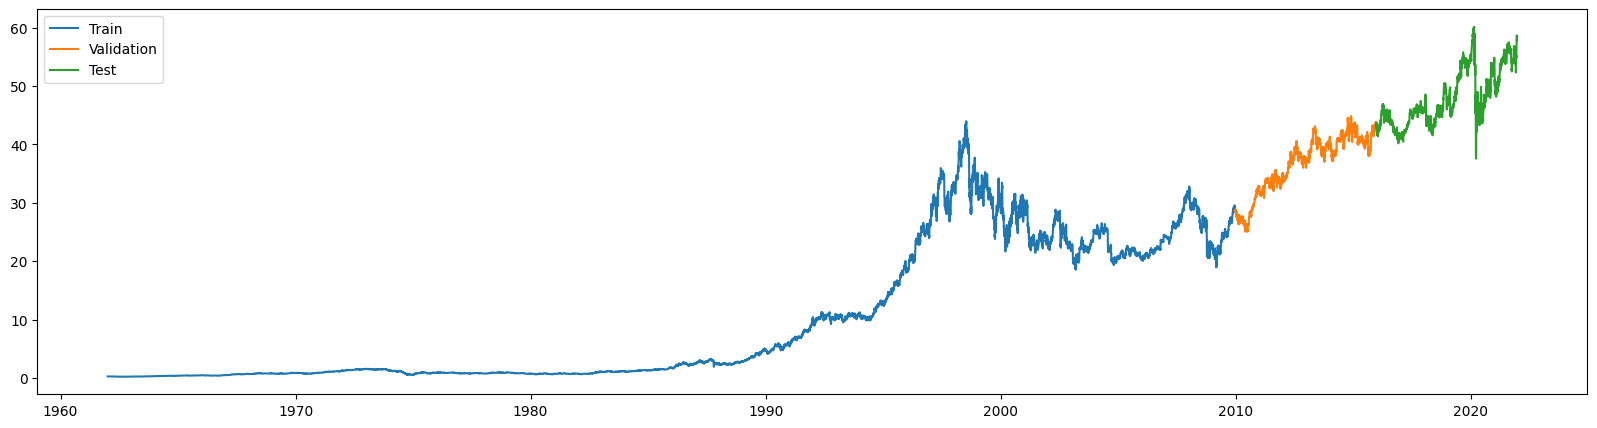

In [437]:
plt.figure(figsize=(20,5))
plt.plot(dates_train, y_train_1)
plt.plot(dates_val, y_val_1)
plt.plot(dates_test, y_test_1)

plt.legend(['Train', 'Validation', 'Test'])

## LSTM

### Adam

#### simple lstm

In [438]:

model = Sequential([Input((3, 1)),
                    LSTM(64),
                    Dense(32, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'],
             )

model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 74.6527 - mean_absolute_error: 3.8934 - val_loss: 0.8594 - val_mean_absolute_error: 0.6637
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0859 - mean_absolute_error: 0.1390 - val_loss: 0.2546 - val_mean_absolute_error: 0.3601
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0893 - mean_absolute_error: 0.1424 - val_loss: 0.1855 - val_mean_absolute_error: 0.3208
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0749 - mean_absolute_error: 0.1321 - val_loss: 0.2455 - val_mean_absolute_error: 0.3635
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0751 - mean_absolute_error: 0.1317 - val_loss: 0.2284 - val_mean_absolute_error: 0.3815
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0889 - mean_absolute_error: 0.1472 - val_loss: 0.2347 - val_mean_absolute_error: 0.3873
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0798 - mean_absolute_error: 0.1388 - val_loss: 0

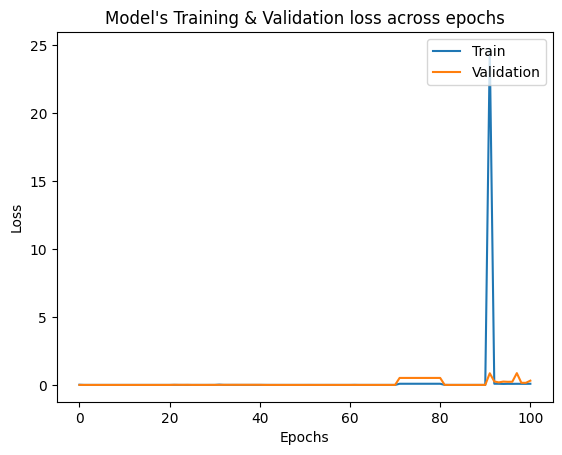

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


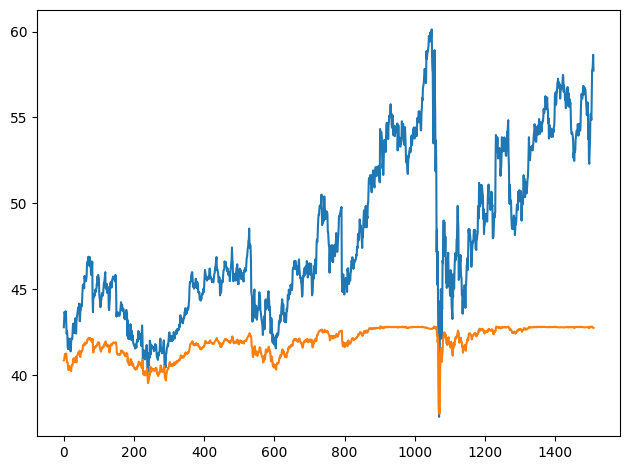

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764
3,"LSTM 64, Dense 2 25,1, Adam 0.001",0.047639,0.749128,0.002934
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.059339,0.613787,0.004517
5,"LSTM 32, 16, Adam 0.001",0.077861,0.349514,0.007609
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"GRU L 4 units 50, Adam 0.001",0.075335,0.414227,0.006852
8,"Data 2, LSTM 64",5.993120,-1.329337,52.221554


In [439]:
plotloss(history)
print_result(model, 'Data 2, LSTM 64', X_test_1, y_test_1)

#### GRU 128,64

Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_30 (GRU)                    │ (None, 3, 128)         │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_31 (GRU)                    │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,465 (369.00 KB)

 Trainable params: 94,465 (369.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 54.7938 - mean_absolute_error: 3.1188 - val_loss: 0.3827 - val_mean_absolute_error: 0.4541
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1322 - mean_absolute_error: 0.1929 - val_loss: 0.5464 - val_mean_absolute_error: 0.5954
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1262 - mean_absolute_error: 0.1876 - val_loss: 0.3957 - val_mean_absolute_error: 0.5111
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0952 - mean_absolute_error: 0.1647 - val_loss: 1.1225 - val_mean_absolute_error: 0.8980
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1100 - mean_absolute_error: 0.1751 - val_loss: 0.2549 - val_mean_absolute_error: 0.3839
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1525 - mean_absolute_error: 0.2083 - val_loss: 1.8802 - val_mean_absolute_error: 1.3058
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1117 - mean_absolute_error: 0.1772 - val_loss: 0

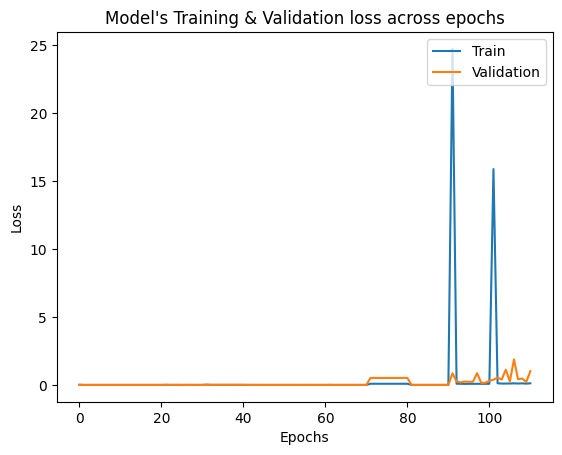

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


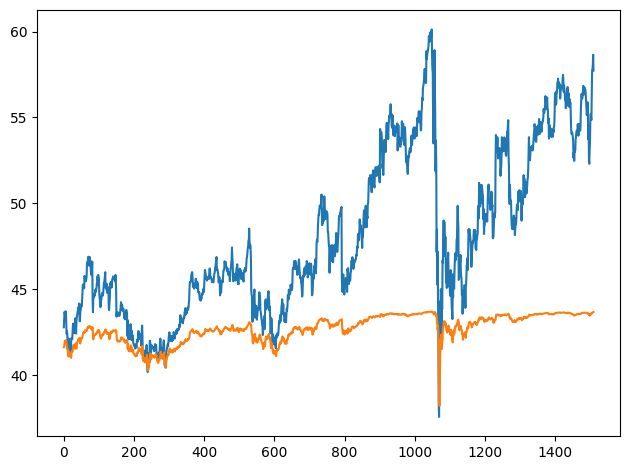

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764
3,"LSTM 64, Dense 2 25,1, Adam 0.001",0.047639,0.749128,0.002934
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.059339,0.613787,0.004517
5,"LSTM 32, 16, Adam 0.001",0.077861,0.349514,0.007609
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"GRU L 4 units 50, Adam 0.001",0.075335,0.414227,0.006852
8,"Data 2, LSTM 64",5.993120,-1.329337,52.221554
9,"Data 2 GRU 128,64",5.262997,-0.956716,43.867729


In [440]:
model = Sequential([
    Input(shape=(3, 1)),
    GRU(128, return_sequences=True),
    GRU(64),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['mean_absolute_error'])
model.summary()
history = model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])
plotloss(history)
print_result(model, 'Data 2 GRU 128,64', X_test_1, y_test_1)

#### LSTM Bidirectional

Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,753 (588.88 KB)

 Trainable params: 150,753 (588.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 39.3935 - mean_absolute_error: 2.4545 - val_loss: 0.4263 - val_mean_absolute_error: 0.5238
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1190 - mean_absolute_error: 0.1742 - val_loss: 0.6560 - val_mean_absolute_error: 0.6470
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0850 - mean_absolute_error: 0.1425 - val_loss: 0.4686 - val_mean_absolute_error: 0.5595
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0978 - mean_absolute_error: 0.1548 - val_loss: 0.3277 - val_mean_absolute_error: 0.4730
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1181 - mean_absolute_error: 0.1720 - val_loss: 0.3402 - val_mean_absolute_error: 0.4393
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0956 - mean_absolute_error: 0.1515 - val_loss: 0.1516 - val_mean_absolute_error: 0.2849
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0921 - mean_absolute_error: 0.1499 - val_loss: 0

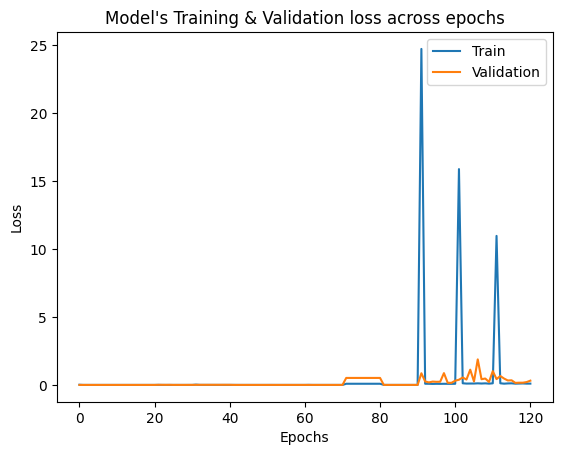

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


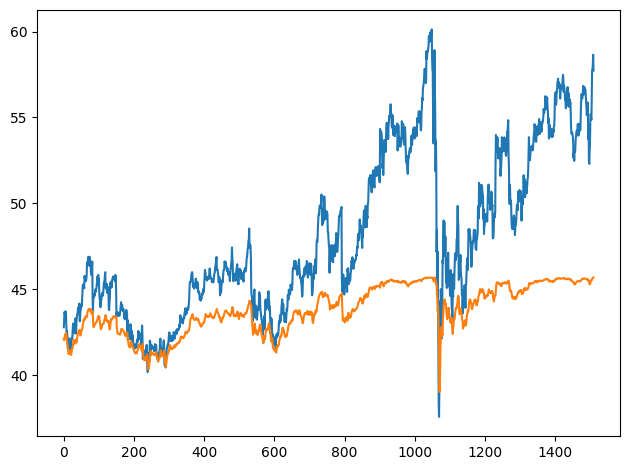

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764
3,"LSTM 64, Dense 2 25,1, Adam 0.001",0.047639,0.749128,0.002934
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.059339,0.613787,0.004517
5,"LSTM 32, 16, Adam 0.001",0.077861,0.349514,0.007609
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"GRU L 4 units 50, Adam 0.001",0.075335,0.414227,0.006852
8,"Data 2, LSTM 64",5.993120,-1.329337,52.221554
9,"Data 2 GRU 128,64",5.262997,-0.956716,43.867729


In [441]:
from keras.layers import  Bidirectional

model = Sequential([
    Input(shape=(3, 1)),
    Bidirectional(LSTM(128)),
    Dense(64, activation='relu'),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['mean_absolute_error'])
model.summary()
history = model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])
plotloss(history)
print_result(model, 'Data 2 Bidirectional LSTM 128', X_test_1, y_test_1)

#### LSTM 128, b64, Dropout

In [442]:
model = Sequential([
    Input(shape=(3, 1)),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['mean_absolute_error'])
model.summary()
history = model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_115 (LSTM)                 │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_116 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,881 (480.00 KB)

 Trainable params: 122,881 (480.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 56.1467 - mean_absolute_error: 3.2512 - val_loss: 1.4460 - val_mean_absolute_error: 0.8897
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2395 - mean_absolute_error: 0.2625 - val_loss: 0.6161 - val_mean_absolute_error: 0.6157
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2229 - mean_absolute_error: 0.2556 - val_loss: 2.5261 - val_mean_absolute_error: 1.4752
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2170 - mean_absolute_error: 0.2532 - val_loss: 0.4736 - val_mean_absolute_error: 0.5167
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2105 - mean_absolute_error: 0.2520 - val_loss: 0.3540 - val_mean_absolute_error: 0.4749
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1663 - mean_absolute_error: 0.2202 - val_loss: 0.2469 - val_mean_absolute_error: 0.3517
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1710 - mean_absolute_error: 0.2287 - val_loss: 0

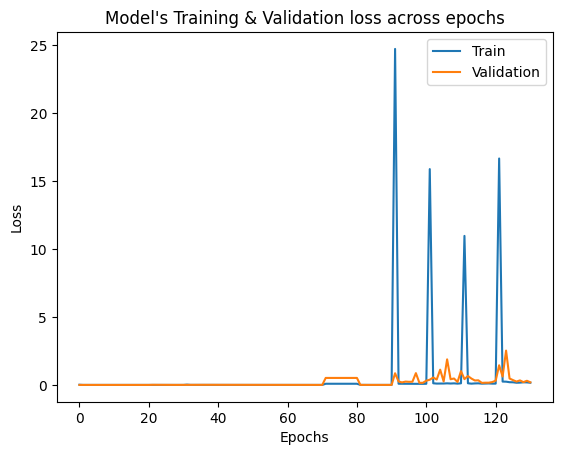

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


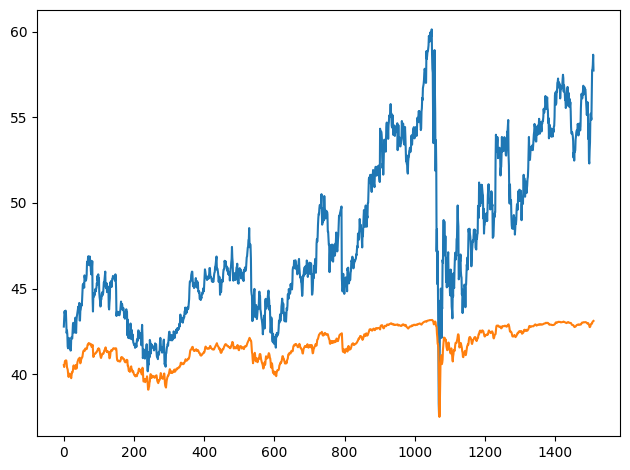

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764
3,"LSTM 64, Dense 2 25,1, Adam 0.001",0.047639,0.749128,0.002934
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.059339,0.613787,0.004517
5,"LSTM 32, 16, Adam 0.001",0.077861,0.349514,0.007609
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"GRU L 4 units 50, Adam 0.001",0.075335,0.414227,0.006852
8,"Data 2, LSTM 64",5.993120,-1.329337,52.221554
9,"Data 2 GRU 128,64",5.262997,-0.956716,43.867729


In [443]:
plotloss(history)
print_result(model, 'Data 2 LSTM 128 D0, LSTM 16', X_test_1, y_test_1)

#### 2 layers, 32, 16 units and dropout

In [448]:


regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(50, return_sequences = True,  input_shape = (X_train_1.shape[1],X_train_1.shape[2])))

regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(units=50,return_sequences=True,activation='tanh'))
regressorLSTM.add(LSTM(units=50,return_sequences=True, activation='tanh'))
regressorLSTM.add(LSTM(units=50,activation='tanh'))


regressorLSTM.add   (Dense(64, activation='relu')),
regressorLSTM.add  (Dense(32, activation='relu')),
regressorLSTM.add ( Dense(16, activation="relu"),)
regressorLSTM.add ( Dense(8, activation="relu")),
# regressorLSTM.add ( Dense(1, activation='linear'))

regressorLSTM.add(Dense(1,activation="relu"))



regressorLSTM.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
regressorLSTM.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])


Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 53.1835 - mean_absolute_error: 3.4549 - val_loss: 7.2793 - val_mean_absolute_error: 2.1522
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.8806 - mean_absolute_error: 0.5007 - val_loss: 2.2739 - val_mean_absolute_error: 1.2344
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5934 - mean_absolute_error: 0.4253 - val_loss: 2.3355 - val_mean_absolute_error: 1.3746
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4610 - mean_absolute_error: 0.3815 - val_loss: 0.5670 - val_mean_absolute_error: 0.6183
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4034 - mean_absolute_error: 0.3712 - val_loss: 0.5973 - val_mean_absolute_error: 0.5502
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3328 - mean_absolute_error: 0.3352 - val_loss: 2.0549 - val_mean_absolute_error: 1.2725
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2870 - mean_absolute_error: 0.3210 - val_loss: 

In [445]:
regressorLSTM.summary()


Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_117 (LSTM)                 │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_118 (LSTM)                 │ (None, 3, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_119 (LSTM)                 │ (None, 3, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_120 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

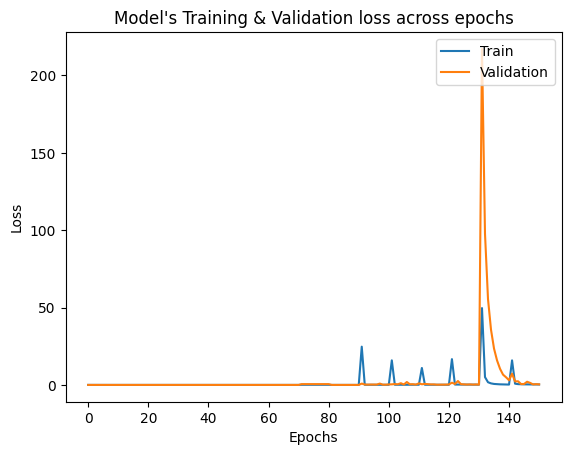

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


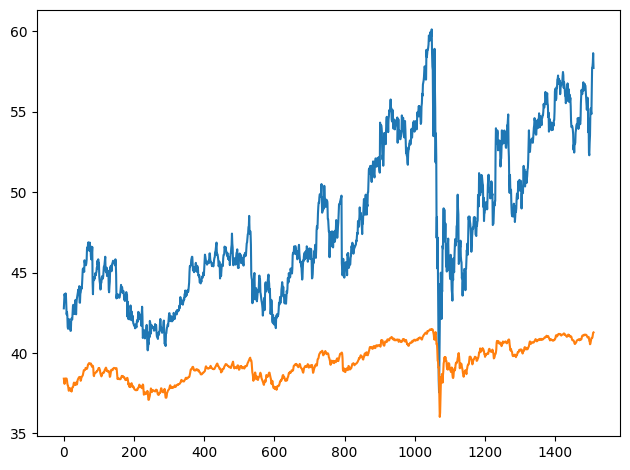

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764
3,"LSTM 64, Dense 2 25,1, Adam 0.001",0.047639,0.749128,0.002934
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.059339,0.613787,0.004517
5,"LSTM 32, 16, Adam 0.001",0.077861,0.349514,0.007609
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
7,"GRU L 4 units 50, Adam 0.001",0.075335,0.414227,0.006852
8,"Data 2, LSTM 64",5.993120,-1.329337,52.221554
9,"Data 2 GRU 128,64",5.262997,-0.956716,43.867729


In [449]:

plotloss(history)
print_result(regressorLSTM, 'Data 2 LSTM 32 D0,2 LSTM 16', X_test_1, y_test_1)



## result

In [447]:
results.sort_values(by='mean sqrd')

,Model,mean abs,R2,mean sqrd
3,"LSTM 64, Dense 2 25,1, Adam 0.001",0.047639,0.749128,0.002934
0,"SimpleRNN 20 units, Adam",0.043076,0.723264,0.003237
4,"LSTM 2 units 50, Dense 2 25,1, Adam 0.001",0.059339,0.613787,0.004517
7,"GRU L 4 units 50, Adam 0.001",0.075335,0.414227,0.006852
5,"LSTM 32, 16, Adam 0.001",0.077861,0.349514,0.007609
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.243939,-4.633613,0.065895
2,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.259228,-5.562840,0.076764
6,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
10,Data 2 Bidirectional LSTM 128,4.189544,-0.305728,29.273197
9,"Data 2 GRU 128,64",5.262997,-0.956716,43.867729
